In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, normalize 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from hyperopt import fmin, tpe, hp,STATUS_OK, Trials, space_eval


**The trivial example below finds the value of x that minimizes a linear function y(x) = x**

In [2]:
#fmin function to minimize
#The parameter algo takes a search algorithm, in this case tpe which stands for tree of Parzen estimators.
best = fmin(
    fn=lambda x: x,
    space=hp.uniform('x', 0, 1),
    algo=tpe.suggest,
    max_evals=100)
print(f'best:{best}')

100%|█████████████████████████████████████████████████| 100/100 [00:00<00:00, 768.46trial/s, best loss: 0.000853258159089225]
best:{'x': 0.000853258159089225}


In [3]:
x=np.linspace(-2, 1.2,8)
y=np.linspace(-2, 1.2,8)
print(f'x:{x} y:{y}')

x:[-2.         -1.54285714 -1.08571429 -0.62857143 -0.17142857  0.28571429
  0.74285714  1.2       ] y:[-2.         -1.54285714 -1.08571429 -0.62857143 -0.17142857  0.28571429
  0.74285714  1.2       ]


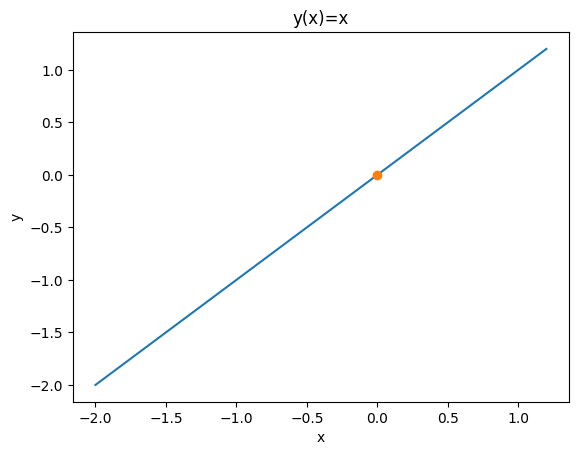

In [4]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y(x)=x")
plt.plot(0,0,ls="", marker="o", label="points")
plt.show()

**trying to minimize a quadratic equation y(x) = (x-1)^2.** 

In [5]:
best = fmin(
    fn=lambda x: (x-1)**2,
    space=hp.uniform('x', -2, 2),
    algo=tpe.suggest,
    max_evals=100)
print(f'best:{best}')

100%|████████████████████████████████████████████████| 100/100 [00:00<00:00, 750.63trial/s, best loss: 7.920910255918599e-05]
best:{'x': 0.9911000504181661}


In [6]:
x=np.linspace(-0.5,2.5,100)
y = (x-1)**2
print(f'x:{x} y:{y}')

x:[-0.5        -0.46969697 -0.43939394 -0.40909091 -0.37878788 -0.34848485
 -0.31818182 -0.28787879 -0.25757576 -0.22727273 -0.1969697  -0.16666667
 -0.13636364 -0.10606061 -0.07575758 -0.04545455 -0.01515152  0.01515152
  0.04545455  0.07575758  0.10606061  0.13636364  0.16666667  0.1969697
  0.22727273  0.25757576  0.28787879  0.31818182  0.34848485  0.37878788
  0.40909091  0.43939394  0.46969697  0.5         0.53030303  0.56060606
  0.59090909  0.62121212  0.65151515  0.68181818  0.71212121  0.74242424
  0.77272727  0.8030303   0.83333333  0.86363636  0.89393939  0.92424242
  0.95454545  0.98484848  1.01515152  1.04545455  1.07575758  1.10606061
  1.13636364  1.16666667  1.1969697   1.22727273  1.25757576  1.28787879
  1.31818182  1.34848485  1.37878788  1.40909091  1.43939394  1.46969697
  1.5         1.53030303  1.56060606  1.59090909  1.62121212  1.65151515
  1.68181818  1.71212121  1.74242424  1.77272727  1.8030303   1.83333333
  1.86363636  1.89393939  1.92424242  1.95454545  

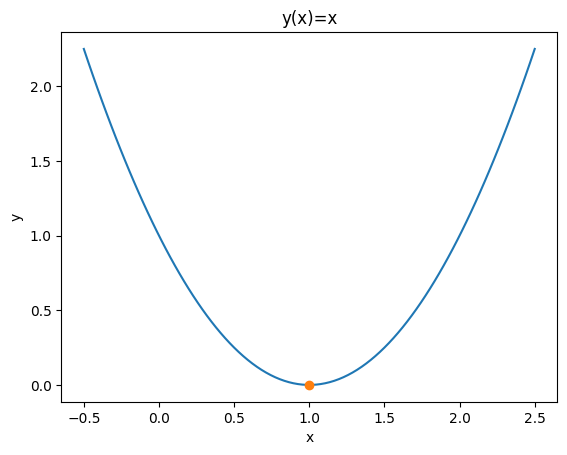

In [7]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y(x)=x")
plt.plot(1,0,ls="", marker="o", label="points")
plt.show()

In [8]:
import hyperopt.pyll.stochastic
space = {
    'x': hp.uniform('x', 0, 1),
    'y': hp.normal('y', 0, 1),
    'name': hp.choice('name', ['alice', 'bob']),
}

print(f'{hyperopt.pyll.stochastic.sample(space)}')

{'name': 'bob', 'x': 0.5159227508625904, 'y': 0.7700818583880696}


In [9]:
fspace = {
    'x': hp.uniform('x', -5, 5)
}
def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=1000, trials=trials)
print(f'best:{best}')
print(f'trials:')
for trial in trials.trials[:2]:
    print(f'{trial}')

100%|██████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.57trial/s, best loss: 3.922407218197422e-08]
best:{'x': -0.00019805068084198605}
trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 1.308228376138377, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-1.1437781149061985]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2023, 9, 20, 3, 42, 21, 546000), 'refresh_time': datetime.datetime(2023, 9, 20, 3, 42, 21, 546000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 23.586800673145895, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [4.856624411373181]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2023, 9, 20, 3, 42, 21, 547000), 'refresh_time': datetime.datetime(2023, 9, 20, 3, 42, 21, 547000)}


Text(0, 0.5, '$x$')

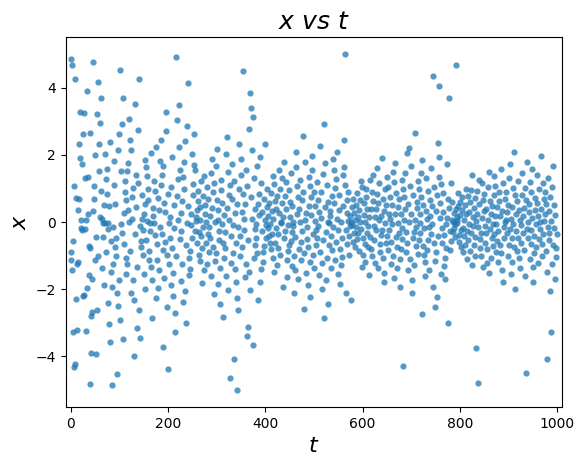

In [10]:
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

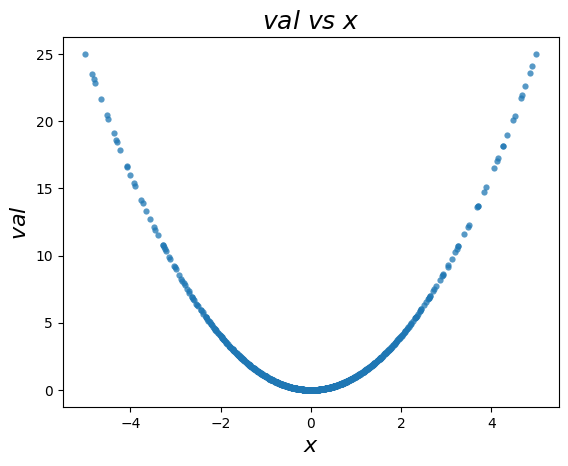

In [11]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


<Axes: xlabel='measurement', ylabel='value'>

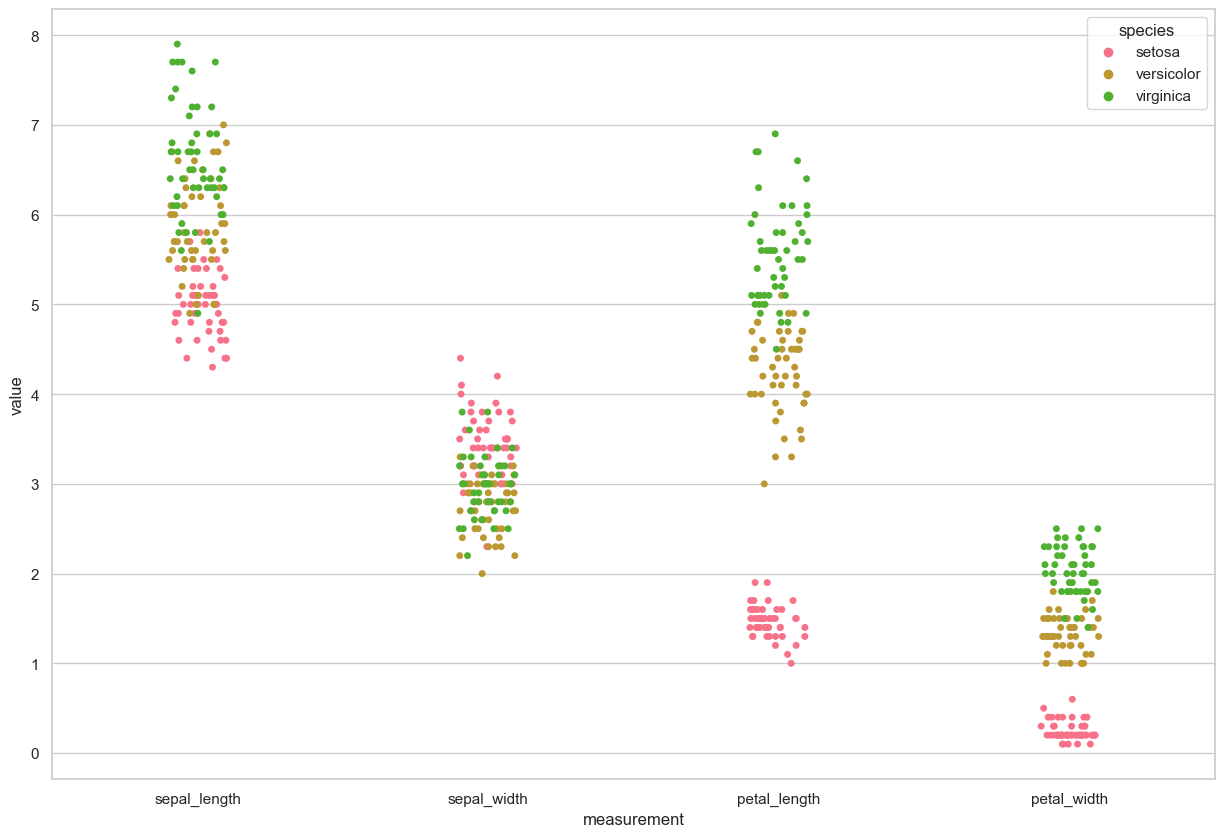

In [12]:
iris = load_iris()
sns.set(style="whitegrid", palette="husl")
iris = sns.load_dataset("iris")
print(f'{iris.head()}')
iris = pd.melt(iris, "species", var_name="measurement")
print(f'{iris.head()}')
f, ax = plt.subplots(1, figsize=(15,10))
sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50))
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print(f'best:{best}')

100%|███████████████████████████████████████████████████| 100/100 [00:01<00:00, 76.87trial/s, best loss: -0.9800000000000001]
best:{'n_neighbors': 5}


Text(0, 0.5, 'cross validation accuracy')

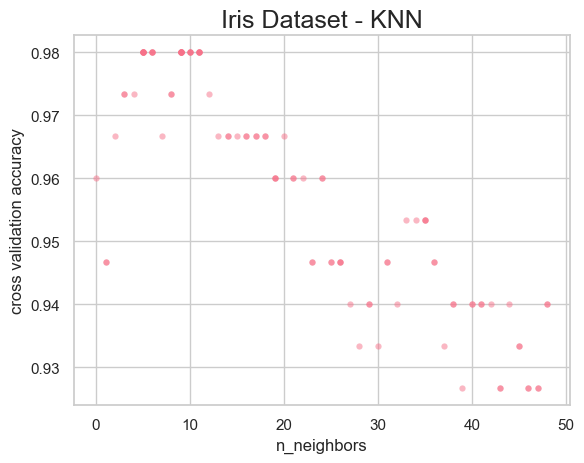

In [14]:
# for t in trials.trials:
#     print(f't:{t["misc"]["vals"]["n_neighbors"]}')
f, ax = plt.subplots(1)#, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

**The model above does not do any preprocessing. So let’s normalize and scale our features and see if that helps**

In [15]:
def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']

    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_, y).mean()
#Error:job exception: __init__() got an unexpected keyword argument 'normalize'
#resolve by intalling: pip install git+https://github.com/hyperopt/hyperopt-sklearn.git
#
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50)),
    'scale': hp.choice('scale', [1]),
    'normalize': hp.choice('normalize', [1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print (space_eval(space4knn, best))
print(f'best:{best}')


100%|███████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.49trial/s, best loss: -0.9800000000000001]
{'n_neighbors': 1, 'normalize': 1, 'scale': 1}
best:{'n_neighbors': 0, 'normalize': 0, 'scale': 0}


/tmp/ipykernel_56978/706726280.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75, c=cmap(float(i)/len(parameters)))


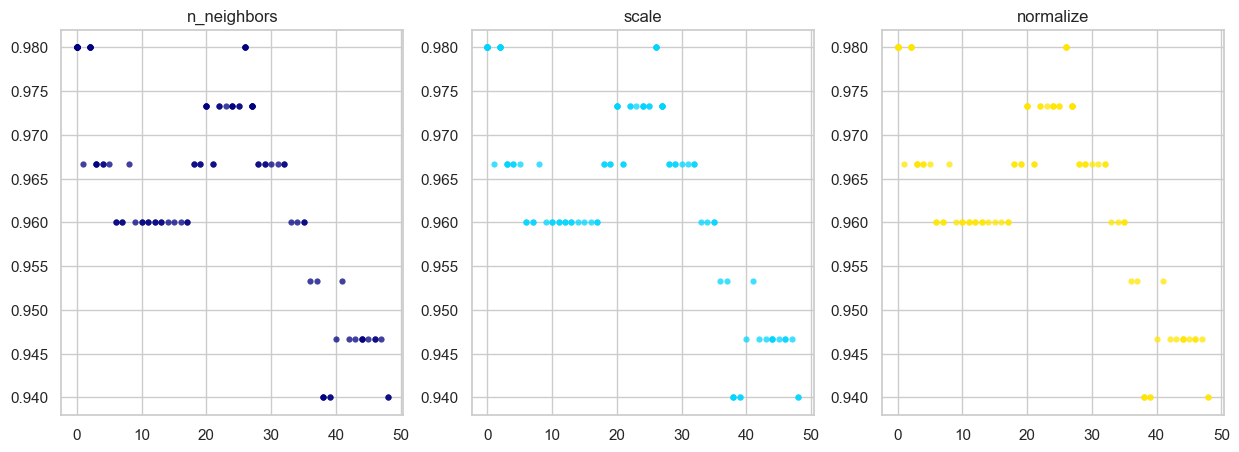

In [16]:
# xs = []
# ys = []
# for t in trials.trials:
#     print(t["misc"]["vals"]["n_neighbors"][0])
#     print(f'{t["result"]["loss"]}')
#     xs.append(t["misc"]["vals"]["n_neighbors"][0])
#     ys.append(-1*t["result"]["loss"])
# print(zip(sorted(zip(xs,ys))))
parameters = ['n_neighbors', 'scale', 'normalize']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(15,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t["misc"]["vals"]["n_neighbors"][0] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    # xs, ys = zip(sorted(zip(xs, ys)))
    ys = np.array(ys).ravel()
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)

***Support Vector Machines (SVM)***

100%|███████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.65trial/s, best loss: -0.9866666666666667]
best:{'C': 0.9646379820967628, 'gamma': 14.318388767038748, 'kernel': 0, 'normalize': 0, 'scale': 0}


/tmp/ipykernel_56978/3214410059.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))


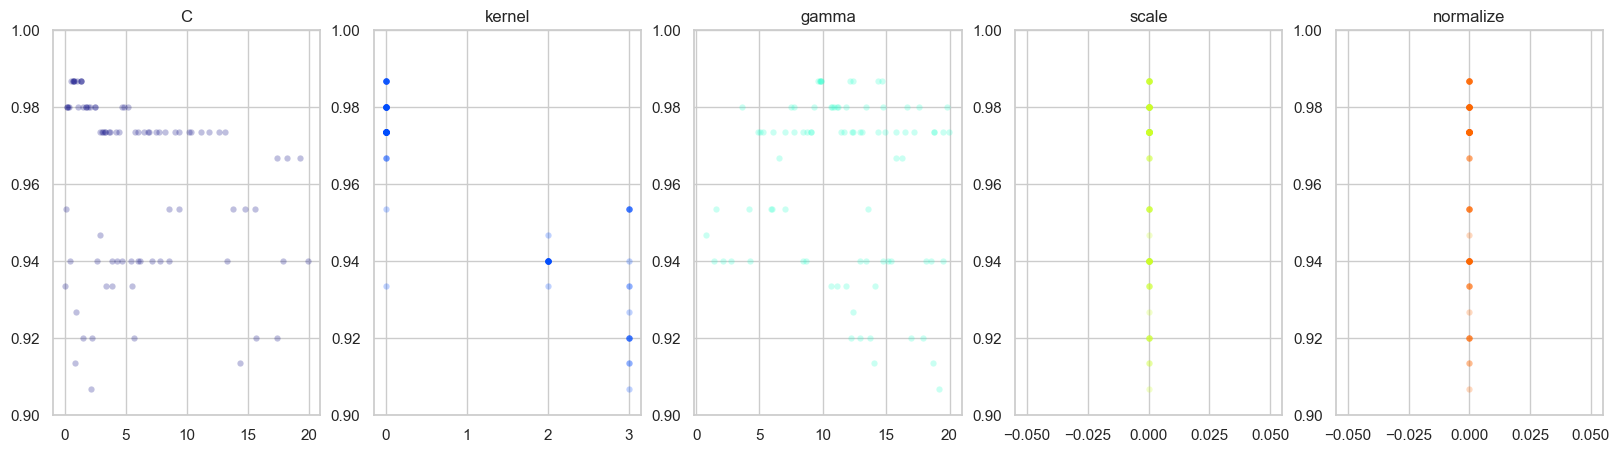

In [17]:
def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = X_ #normalize(X_)
            del params['normalize']
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = X_ #scale(X_)
            del params['scale']
    clf = SVC(**params)
    return cross_val_score(clf, X_, y).mean()
space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20),
    'scale': hp.choice('scale', [1]),
    'normalize': hp.choice('normalize', [1])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
# print space_eval(space4rf, best)
print(f'best:{best}')

parameters = ['C', 'kernel', 'gamma', 'scale', 'normalize']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    # xs, ys = zip(\*sorted(zip(xs, ys)))
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)
    axes[i].set_ylim([0.9, 1.0])


***Decision Trees***

100%|███████████████████████████████████████████████████| 300/300 [00:03<00:00, 91.44trial/s, best loss: -0.9733333333333334]
best:{'criterion': 0, 'max_depth': 2, 'max_features': 3, 'normalize': 0, 'scale': 0}


/tmp/ipykernel_56978/3672604501.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))


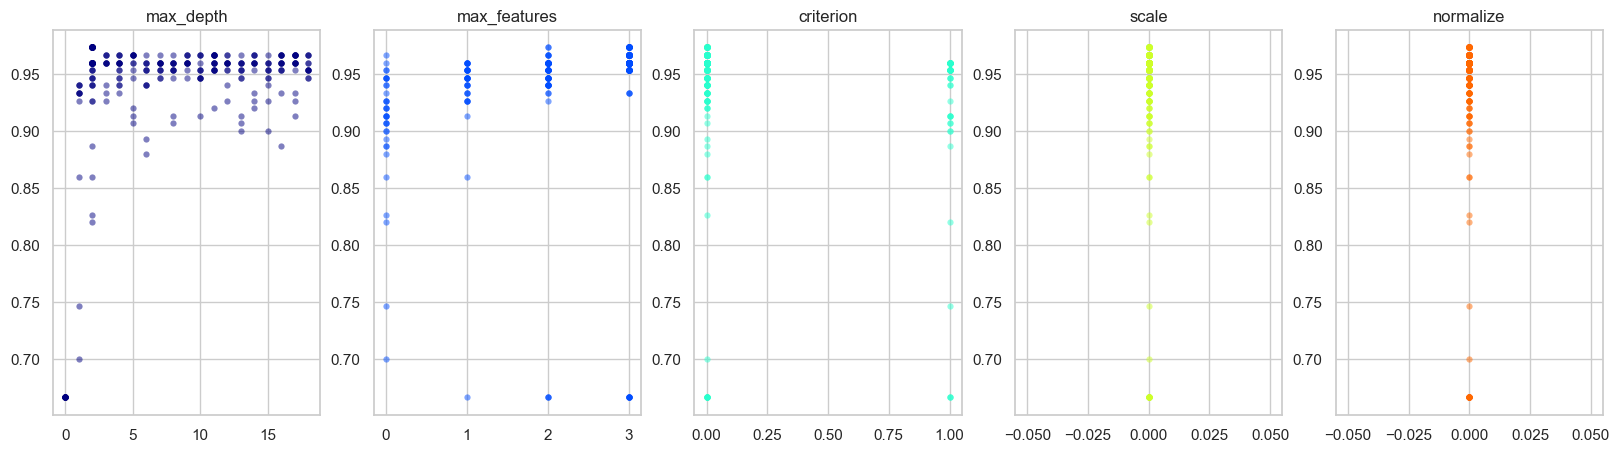

In [18]:
def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']    
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X, y).mean()
    
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'scale': hp.choice('scale', [1]),
    'normalize': hp.choice('normalize', [1])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
    
trials = Trials()
    
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=300, trials=trials)
print(f'best:{best}')

parameters = ['max_depth', 'max_features', 'criterion', 'scale', 'normalize'] # decision tree
cols = len(parameters)
f, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    # xs, ys = zip(\*sorted(zip(xs, ys)))
    ys = np.array(ys)
    ax[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))
    ax[i].set_title(val)
    #axes[i].set_ylim([0.9,1.0])

**Random Forests**

In [19]:
def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']    
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X, y).mean()
    
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'scale': hp.choice('scale', [1]),
    'normalize': hp.choice('normalize', [1])
}

best = 0

def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
    print(f'new best:,{best},{params}')
    return {'loss': -acc, 'status': STATUS_OK}
    
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=300, trials=trials)
print(f'best:{best}')


new best:,0.7266666666666668,{'criterion': 'entropy', 'max_depth': 1, 'max_features': 2, 'n_estimators': 10}                 
new best:,0.9533333333333334,{'criterion': 'entropy', 'max_depth': 14, 'max_features': 4, 'n_estimators': 10}                
new best:,0.96,{'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'n_estimators': 16}                               
new best:,0.96,{'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'n_estimators': 7}                                   
new best:,0.96,{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'n_estimators': 5}                                   
new best:,0.9666666666666668,{'criterion': 'gini', 'max_depth': 11, 'max_features': 3, 'n_estimators': 17}                   
new best:,0.9666666666666668,{'criterion': 'gini', 'max_depth': 15, 'max_features': 3, 'n_estimators': 12}                   
new best:,0.9666666666666668,{'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'n_estimators': 1}              

0,n_estimators
1,max_depth
2,max_features
3,criterion
4,scale
5,normalize


/tmp/ipykernel_56978/3530878552.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[int(i/3),i%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))


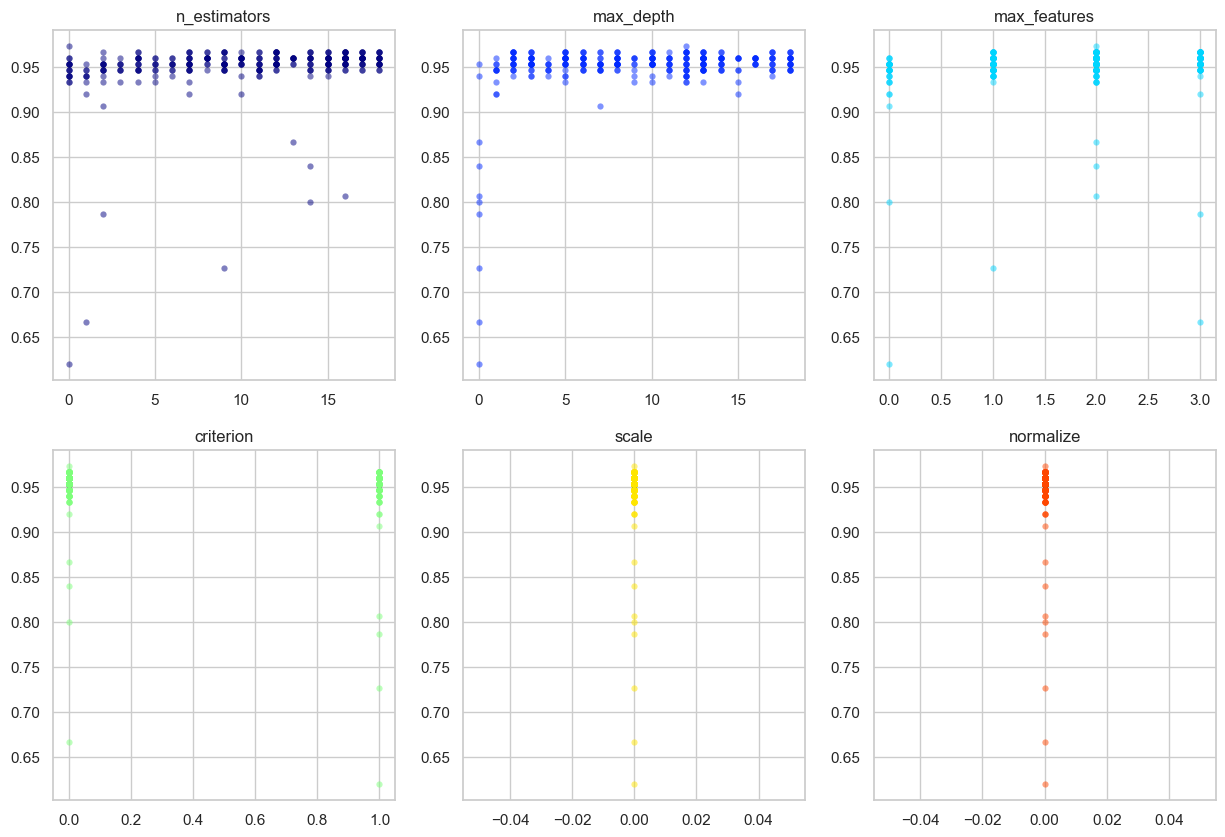

In [20]:
parameters = ['n_estimators', 'max_depth', 'max_features', 'criterion', 'scale', 'normalize']
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
cmap = plt.cm.jet

for i, val in enumerate(parameters):
    print(f'{i},{val}')
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    # print(f'{xs}')
    ys = np.array([-t['result']['loss'] for t in trials.trials])
    # # # xs, ys = zip(\*sorted(zip(xs, ys)))
    # print(f'{ys}')
    ax[int(i/3),i%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))
    ax[int(i/3),i%3].set_title(val)

In [21]:
#https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce
#http://hyperopt.github.io/hyperopt/
#